# Assignment 2
### Learning Outcomes 
By completing this assignment, you will gain and demonstrate skills relating to 
- working within the python environment  
- visualizing of numerical data continued 
- tabulation and plotting of discrete data 
- Calculating joint, marginal, and conditional probabilities  
- Summarizing and plotting numerical data by group 

### Problem Description
As a data scientist for a Hollywood investment company you have been charged with creating a summary of the last 250 movies so that your boss can have a deeper understanding of the movie industry. The dataset that you will be working with includes 8 different variables: 
- North American box office revenue  
- Cost to produce the movie 
- Income of the director 
- Gender of the director 
- Year of release 
- Month of release 
- Movie genre 
- Number of theaters at release 

### General Marking criteria: 
- Does the program behave according to specifications?
- Are you using appropriate data structures?
- Is the output according to specifications?
- Are all questions answered fully? Written responses must be answered in full English sentences.
- Comments for pieces of code that are longer than few line 
- All figures require axis labels + a caption
- Use Python coding conventions and good programming techniques, for example:
    * meaningful variable names
    * conventions for naming variables and constants
    * Use of constants where appropriate
    * Readability: indention, white space, consistency.

## Task 1: Plotting histograms II (Subplots) (? / 15 points)
In order to set up your notebook environment so it includes figures inline write the following code <br>

import matplotlib <br>
matplotlib.use('TkAgg') <br>
import matplotlib.pyplot as plt <br> 
%matplotlib inline <br>

In [154]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns

### Question1. Load the movieDataset and calculate the new column "profit" as in the previous assignment (? / 2 points)

In [155]:
df = pd.read_csv('movieDataset.csv')

df['profit'] = df['boxoff'] - df['prodcost']
print(df['profit'])

0       43.905646
1      106.499408
2      208.733401
3       55.602844
4       89.628307
          ...    
245    114.487850
246     78.861488
247    116.142533
248    183.123485
249     75.223441
Name: profit, Length: 250, dtype: float64


### Question2. Generate a new figure with an array of 6 subplots (2 rows and 3 columns recommended, see pages 220-223). In the subplots, provide a histogram for the variables boxoff, prodcost,  dirIncome, release month, year released, profit. For each variable, choose an appropriate number of bins (? / 4 points)

(2, 3)


Text(0, 0.5, 'count')

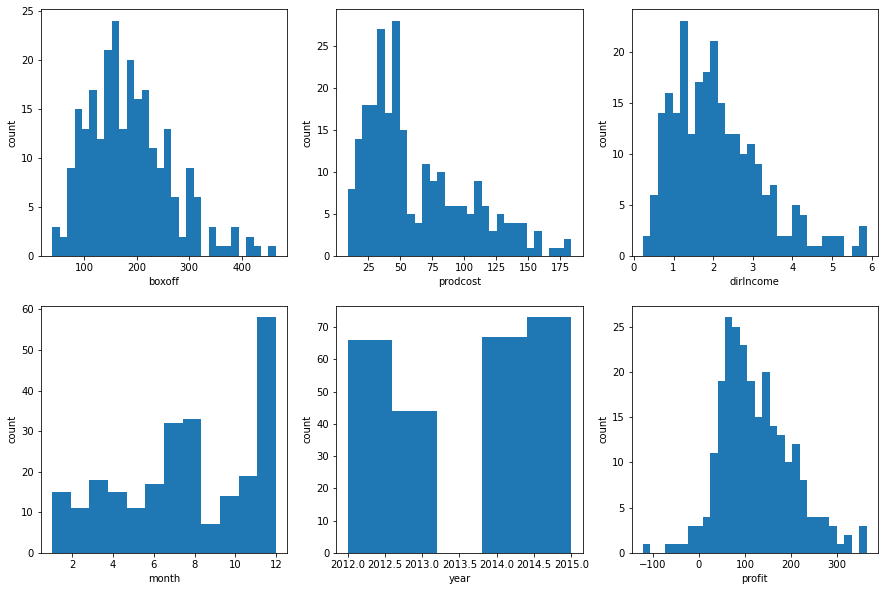

In [156]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 10))
print(axes.shape)

axes[0,0].hist(df['boxoff'], bins = 30)
axes[0,0].set_xlabel('boxoff')
axes[0,0].set_ylabel('count')

axes[0,1].hist(df['prodcost'], bins = 30)
axes[0,1].set_xlabel('prodcost')
axes[0,1].set_ylabel('count')

axes[0,2].hist(df['dirIncome'], bins = 30)
axes[0,2].set_xlabel('dirIncome')
axes[0,2].set_ylabel('count')

axes[1,0].hist(df['month'], bins = 12)
axes[1,0].set_xlabel('month')
axes[1,0].set_ylabel('count')

axes[1,1].hist(df['year'], bins = 5)
axes[1,1].set_xlabel('year')
axes[1,1].set_ylabel('count')

axes[1,2].hist(df['profit'], bins = 30)
axes[1,2].set_xlabel('profit')
axes[1,2].set_ylabel('count')

Figure 1: Array of 6 subplots for variables boxoff, prodcost, dirIncome, month, year, and profit.

### Question 3. Written response: Justify the number of bins chosen for each variable. ( ? / 3 points)

1 - 3. boxoff, prodcost, and dirIncome have bins equal to 30 since they all have very similar shapes and this bin represented the best shape of the data while smaller values didn't reveal the full shape
4. Month has bins equal to 12 since any higher bins would create a comb-like pattern and any lower would hide some of the shape of the data
5. Year has bins equal to 5 since this was the value that best represented the shape of the data since any higher would separate each bar too much.
6. Profit has bins equal to 30 since it best revealed all of the data and showed the distribution well.

### Question 4: Describe the shape of the distribution for each variable, including the number of modes and the shape (symmetric, skew, uniform?).  (? / 6 points)

1. Unimodal with right skew (boxoff)
2. Bimodal with right skew (prodcost)
3. Unimodal with right skew (dirIncome)
4. Bimodal with left skew (month)
5. Bimodal with slight left skew (year)
6. Unimodal with symmetric (profit)

## Task 2: Tabulating and visualizing categorical data (pg. 24-30 and pg 250-256) (? / 20 points)

### Question1. Create a contingency table of director gender (rows) by genre (columns) without the marginal sums. You may normalize the table by rows or columns. Print to the screen. (? / 4 points)

In [157]:
con_table = pd.crosstab(df['dirGender'], df['genre'], normalize = 'index')
display(con_table)

genre,action,adventure,comedy,drama,other
dirGender,,,,,
female,0.243243,0.162162,0.351351,0.135135,0.108108
male,0.225352,0.272300,0.164319,0.145540,0.192488


### Question2. Plot the genre counts by director gender as a grouped bar chart (? / 3 points)

<AxesSubplot:xlabel='dirGender'>

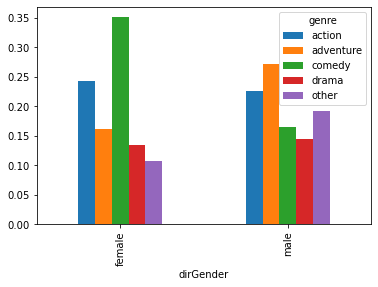

In [158]:
con_table.plot(kind = 'bar')

Figure 2: Bar plot for the contingency table of dirGender and genre

### Question3. Make a Figure with 2 subplots. Plot the genre counts by director gender as a grouped barplot in one subplot, and as a stacked bar chart in the other subplot. (? / 3 points)

Text(0.5, 1.0, 'Stacked Barplot for dirGender and genre')

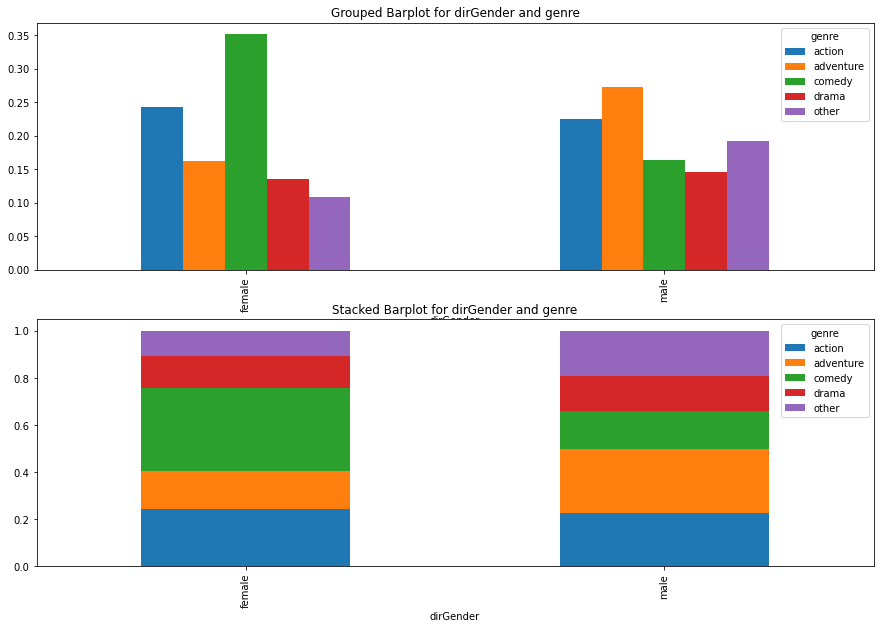

In [159]:
fig, axes = plt.subplots(2, figsize = (15, 10))

con_table.plot(kind = 'bar', ax = axes[0])
axes[0].set_title('Grouped Barplot for dirGender and genre')

con_table.plot(kind = 'bar', stacked = True, ax = axes[1])
axes[1].set_title('Stacked Barplot for dirGender and genre')

Figure 3: Grouped bar plot and Stacked bar plot for dirGender and genre

### Question4. Generate a table of director Gender (rows) and genre (columns), normalized by the row-marginal counts of male and female director, such that you have conditional probabilities of movie genre, given the gender of the director. Print the table and make a stacked barplot. (? / 3 points)

genre,action,adventure,comedy,drama,other
dirGender,,,,,
female,0.243243,0.162162,0.351351,0.135135,0.108108
male,0.225352,0.272300,0.164319,0.145540,0.192488
All,0.228000,0.256000,0.192000,0.144000,0.180000


<AxesSubplot:xlabel='dirGender'>

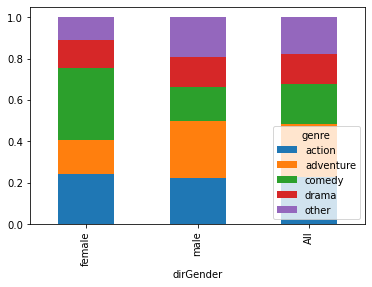

In [160]:
gender_table = pd.crosstab(df['dirGender'], df['genre'], margins = True, normalize = 'index')
display(gender_table)

gender_table.plot(kind = 'bar', stacked = True)

Figure 4: Normalized Stacked bar plot for dirGender and genre

### Question5. Generate a table of movie genre (rows) and director gender (columns), normalized by the row-marginal counts for each genre, such that you have conditional probabilities of the director gender, given the movie genre.  Print the table and make a stacked barplot. (? / 3 points) (? / 3 points)

dirGender,female,male
genre,,
action,0.157895,0.842105
adventure,0.093750,0.906250
comedy,0.270833,0.729167
drama,0.138889,0.861111
other,0.088889,0.911111
All,0.148000,0.852000


<AxesSubplot:xlabel='genre'>

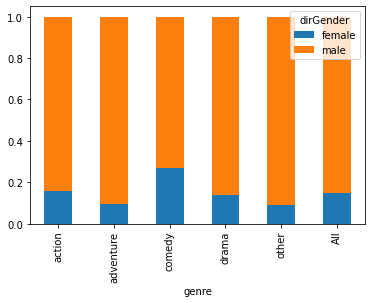

In [161]:
genre_table = pd.crosstab(df['genre'], df['dirGender'], margins = True, normalize = 'index')
display(genre_table)
    
genre_table.plot(kind = 'bar', stacked = True)

Figure 5: Normalized Stacked bar plot for genre and dirGender

### Question6. Written response: Compare the 2 plots from questions 4 and 5. For each plot, describe which aspect of the data can be most readily seen (? / 4 points)

In the first plot, it is easy to read the distribution of directors in each genre by the gender of the director.  In the second plot, it is much more easy to read the disparity between the male and female directors in each genre of film.

## Task 3: Probabilities (? / 20 points)

For each of the questions in this task, you  should show the formula you used to compute the probability. <br>
For each of the tasks in this section, print the answer in a full sentence. For instance, your output should not just be a value but instead: <br>
__Probability of movie being sci-fi given that the gender of the director is male, is 0.602__ <br>
Using the contingency tables, compute and print:

### Question1. The marginal probability of a movie being an action movie (? / 2 points)

In [162]:
#The marginal probability of a movie being an action movie is 0.228. 
#Formula: total number of action movies / total number of all movies = 57  /250 = 0.228

### Question2. the marginal probability of a movie being a comedy (? / 2 points)

In [163]:
#The marginal probability of a movie being a comedy is 0.192.
#Formula: total number of comedy movies / total number of all movies = 48 / 250 = 0.192

### Question3. the marginal probability of the director being female (? / 2 points)

In [164]:
#The marginal probability of a director being female is 0.148.
#Formula: total number of female directors / total number of all directors = 37 / 250 = 0.148

### Question4. the conditional probability of the movie being an action movie given that the director’s gender is female (? / 2 points)

In [165]:
#The conditional probability of a movie being an action movie given that the director is female is 0.243.
#Formula: P(action movie | female director) = P(action movie and female director) / P(female director) = 9 / 37 = 0.243

### Question5. the conditional probability of the movie being an action movie given that the director’s gender is male (? / 2 points)

In [166]:
#The conditional probability of a movie being an action movie given that the director is male is 0.225.
#Formula: P(action movie | male director) = P(action movie and male director) / P(male director) = 48 / 213 = 0.225

### Question6. the conditional probability of the director’s gender being female given that the movie is an action movie (? / 2 points)

In [167]:
#The conditional probability of a director being female given that the movie is an action movie is 0.158.
#Formula: P(female director | action movie) = P(female director and action movie) / P(action movie) = 9 / 57 = 0.158

### Question7. the conditional probability of the director’s gender being male knowing that the movie is an action movie (? / 2 points)

In [168]:
#The conditional probability of a director being male given that the movie is an action movie is 0.842.
#Formula: P(male director | action movie) = P(male director and action movie) / P(action movie) = 48 / 57 = 0.842

### Question8. How does the probability of the director being female change from when you don’t know what the movie is to when you know that the movie is an action movie?  (? / 2 points)

The probability changes from a lower number to a higher number most likely due to the distribution of female directors in each category compared to the overall total number of female directors.  In other words, action movies are likely to have a higher distribution of female directors to the total number of actions movies compared to that of the total number of female directors in all movies to the total number of all movies.

### Question9. What is the joint probability of a movie being an action movie AND being directed by a woman? (? / 2 points)

In [169]:
#The joint probability of a movie being an action movie and being directed by a woman is 0.036.
#Formula: P(action movie and female director) = cell of female and action / total of table

### Question10. What is the expected probability of a movie being an action movie AND being directed by a woman IF gender and genre were independent? (? / 2 points)

In [170]:
#The expected probability of a movie being an action movie and being directed by a women if both variables were independent is 8.436.
#Formula: (row total*column total) / table total

## Task 4: Descriptive Statistics by Category (pg 24-30 and pg 250-256) (? / 20 points)

### Question1. Using pandas statistics functions (pg. 137-141) and the groupby method determine the mean for production cost by gender. (? / 5 points)

In [171]:
g_prod = df['prodcost'].groupby(df['dirGender'])
print(g_prod)

sub_gprod_mean = g_prod.mean()
print(sub_gprod_mean)

dirGender
female    53.186599
male      64.998486
Name: prodcost, dtype: float64


### Question2. Determine and print the mean for production cost by genre. For this question instead of writing four individual print statements use a for loop to iterate over the different genre’s that exist. This needs to be done in three steps (? / 15 points)

#### a. Use the groupby function to calculate the mean by genre (? / 3 points)

In [172]:
g_gen = df['prodcost'].groupby(df['genre'])

sub_ggen_mean = g_gen.mean()

#### b. Create a variable that stores the names of the genre categories  (? / 3 points)

In [173]:
name_genres = g_gen.groups.keys()

#### c. Iterate over this variable using a for loop and print the means for each category using a full sentence of the form "The mean production cost for an xxxx movie is yyyy. (? / 9 points)

In [174]:
for i in name_genres:
    print(f'The mean production cost for an {i} movie is {sub_ggen_mean[i]}')

The mean production cost for an action movie is 94.58533282673791
The mean production cost for an adventure movie is 91.49018432495322
The mean production cost for an comedy movie is 35.530387780043235
The mean production cost for an drama movie is 42.72801437146048
The mean production cost for an other movie is 29.381751894250385


## Task 5: Histogram visualization by group (? / 25 points)
In this task you will learn how to use __seaborn__. Seaborn is a library built on top of matplotlib and it's closely integrated with pandas data structures.  

### Question1.Using _groupby_ create two series, one that has the director’s income for those of the male gender, and one for females.  Use _groupby_ to first group the directorIncome values and then use _get_group(genderValue)_ to create a new series for the specified gender (? / 4 points)

In [175]:
g_dInc = df['dirIncome'].groupby(df['dirGender'])
g_dInc_male = g_dInc.get_group('male')
g_dInc_female = g_dInc.get_group('female')

### Question2. Visualize on the same plot the distribution of incomes using the histogram – plot the two histograms on top of each other for direct comparison. (? /5 points)

<AxesSubplot:>

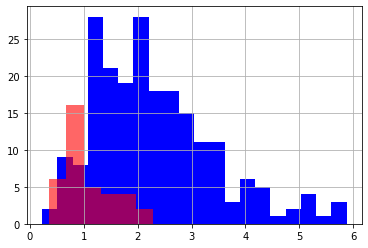

In [176]:
g_dInc_male.hist(bins = 20, color = 'blue')
g_dInc_female.hist(bins = 6, color = 'red', alpha = 0.6)

Figure 6: Bar plot showcasing both male and female dirIncome data (red is female, blue is male)

### Question3. Plot the same data, using a boxplot, splitting by directorGender (? / 4 points)

<AxesSubplot:xlabel='dirGender', ylabel='dirIncome'>

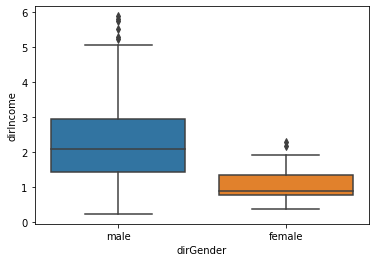

In [177]:
sns.boxplot(x = "dirGender", y = "dirIncome", data = df)

Figure 7: Boxplot for dirGender and dirIncome

### Question4. Plot the same data using a violin plot, splitting by director gender. (? / 4 points)

<AxesSubplot:xlabel='dirGender', ylabel='dirIncome'>

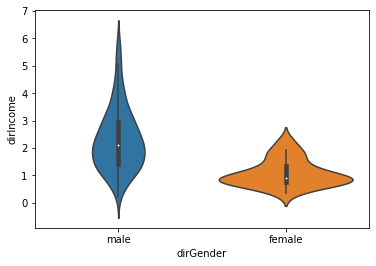

In [178]:
sns.violinplot(x = "dirGender", y = "dirIncome", data = df)

Figure 8: Violin plot for dirGender and dirIncome

### Question5. Make a boxplot of director income split by movie genre. (? /4 points)

<AxesSubplot:xlabel='genre', ylabel='dirIncome'>

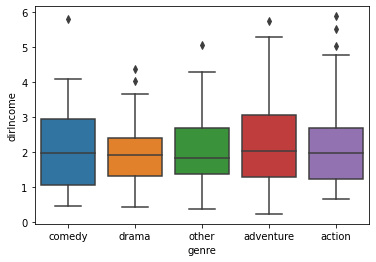

In [179]:
sns.boxplot(x = "genre", y = "dirIncome", data = df)

Figure 9: Boxplot for genre and dirIncome

### Question6. Make a violinplotof director income split by movie genre (? / 4 points)

<AxesSubplot:xlabel='genre', ylabel='dirIncome'>

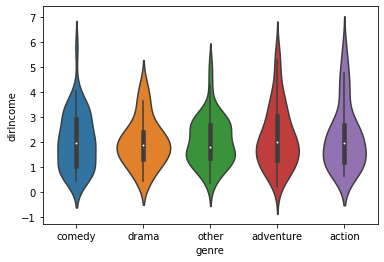

In [180]:
sns.violinplot(x = "genre", y = "dirIncome", data = df)

Figure 10: Violin plot for genre and dirIncome